In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
all_eq = pd.read_excel('../mf/all-equity-excluding-sector-funds-2021.xlsx', skiprows=5, index_col=0)

In [3]:
all_eq

,Rating,Category,Launch,Expense Ratio (%),Net Assets (Cr),Fund Manager Tenure,Fund Risk Grade,Fund Return Grade,Riskometer,Standard Deviation,...,Alpha,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021
Fund Name,,,,,,,,,,,,,,,,,,,,,
Aditya Birla Sun Life Bal Bhavishya Yojna - Direct Plan,--,EQ-FLX,2019-02-11 00:00:00,0.95,520,2.9,--,--,Very High,--,...,--,--,--,--,--,--,--,--,16.29,14.24
Aditya Birla Sun Life Equity Advantage Fund - Direct Plan,3,EQ-L&MC,2013-01-01 00:00:00,1.06,6009,9.0,High,Average,Very High,24.04,...,1.78,0.94,60.96,5.83,9.72,43.66,-12.66,9.87,19.42,39.46
Aditya Birla Sun Life Flexi Cap Fund - Direct Plan,3,EQ-FLX,2013-01-01 00:00:00,0.99,15514,9.0,Average,Average,Very High,22.96,...,-0.73,0.97,58.03,3.87,16.24,35.07,-3.01,9.53,17.11,31.38
Aditya Birla Sun Life Focused Equity Fund - Direct Plan,3,EQ-LC,2013-01-01 00:00:00,1.05,5163,9.0,Below Average,Average,Very High,21.24,...,1.07,0.98,50.21,0.84,7.92,32.56,-3.03,12.23,17.05,27.85
Aditya Birla Sun Life Frontline Equity Fund - Direct Plan,2,EQ-LC,2013-01-01 00:00:00,1.07,21542,9.0,Average,Below Average,Very High,21.66,...,-0.64,0.99,46.04,2.01,8.49,32.04,-1.98,8.4,15.02,28.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UTI Nifty Next 50 Index Fund - Direct Plan,2,EQ-LC,2018-06-28 00:00:00,0.33,1424,3.5,Above Average,Below Average,Very High,19.94,...,-0.4,0.92,--,--,--,--,--,1.55,15.41,30.27
UTI Sensex Exchange Traded Fund,--,EQ-LC,2015-08-26 00:00:00,0.07,18531,3.5,--,--,Very High,21.74,...,-0.29,0.99,--,--,3.52,29.58,7.1,15.62,17.05,21.44
UTI Small Cap Fund - Direct Plan,--,EQ-SC,2020-12-22 00:00:00,0.22,1912,1.1,--,--,Very High,--,...,--,--,--,--,--,--,--,--,--,58.5


In [4]:
all_eq.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, Aditya Birla Sun Life Bal Bhavishya Yojna - Direct Plan to UTI Value Opportunities Fund - Direct Plan
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rating               374 non-null    object 
 1   Category             374 non-null    object 
 2   Launch               374 non-null    object 
 3   Expense Ratio (%)    374 non-null    object 
 4   Net Assets (Cr)      374 non-null    object 
 5   Fund Manager Tenure  374 non-null    float64
 6   Fund Risk Grade      374 non-null    object 
 7   Fund Return Grade    374 non-null    object 
 8   Riskometer           374 non-null    object 
 9   Standard Deviation   374 non-null    object 
 10  Sharpe Ratio         374 non-null    object 
 11  Sortino Ratio        374 non-null    object 
 12  Beta                 374 non-null    object 
 13  Alpha                374 non-null    object 
 14  R-

# Data Exploration

Convert strings to numeric values

In [5]:
all_eq['Rating'] = all_eq['Rating'].apply(pd.to_numeric, errors='coerce')

In [6]:
all_eq.iloc[:, 3:6] = all_eq.iloc[:, 3:6].apply(pd.to_numeric, errors='coerce')

In [7]:
all_eq.iloc[:, 9:] = all_eq.iloc[:, 9:].apply(pd.to_numeric, errors='coerce')

In [8]:
all_eq.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, Aditya Birla Sun Life Bal Bhavishya Yojna - Direct Plan to UTI Value Opportunities Fund - Direct Plan
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rating               212 non-null    float64
 1   Category             374 non-null    object 
 2   Launch               374 non-null    object 
 3   Expense Ratio (%)    359 non-null    float64
 4   Net Assets (Cr)      360 non-null    float64
 5   Fund Manager Tenure  374 non-null    float64
 6   Fund Risk Grade      374 non-null    object 
 7   Fund Return Grade    374 non-null    object 
 8   Riskometer           374 non-null    object 
 9   Standard Deviation   265 non-null    float64
 10  Sharpe Ratio         265 non-null    float64
 11  Sortino Ratio        265 non-null    float64
 12  Beta                 265 non-null    float64
 13  Alpha                265 non-null    float64
 14  R-

In [9]:
all_eq.describe()

,Rating,Expense Ratio (%),Net Assets (Cr),Fund Manager Tenure,Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021
count,212.000000,359.000000,360.000000,374.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,199.000000,206.000000,227.000000,235.000000,249.000000,269.000000,304.000000,326.000000
mean,3.047170,0.757382,3946.044444,3.514439,21.932566,0.757660,0.841396,0.947811,1.229585,0.942377,51.804372,3.677087,5.424493,37.934383,-4.184337,8.669033,18.585132,35.946472
std,1.052031,0.532059,9262.862887,2.884275,2.529921,0.174192,0.209263,0.096839,3.798272,0.055234,18.445410,6.071718,4.235290,9.426493,7.273048,6.517440,8.529701,12.878437
min,1.000000,0.020000,1.000000,0.000000,10.880000,0.270000,0.360000,0.480000,-8.720000,0.550000,11.890000,-15.050000,-5.930000,5.260000,-28.500000,-23.240000,-7.980000,12.680000
25%,2.000000,0.300000,192.000000,1.200000,20.610000,0.660000,0.730000,0.890000,-0.690000,0.920000,39.175000,-1.342500,3.160000,30.275000,-8.260000,4.630000,14.645000,25.615000
50%,3.000000,0.690000,721.000000,2.700000,21.660000,0.710000,0.800000,0.960000,0.360000,0.950000,48.740000,3.480000,4.470000,37.710000,-3.830000,9.790000,16.580000,33.160000
75%,4.000000,1.100000,3396.250000,5.275000,23.220000,0.850000,0.910000,1.010000,2.890000,0.980000,58.460000,7.560000,8.155000,43.740000,1.430000,13.360000,21.250000,41.470000
max,5.000000,2.580000,118703.000000,13.600000,32.320000,1.370000,1.790000,1.260000,14.460000,1.000000,112.770000,22.290000,16.920000,80.440000,9.970000,29.230000,76.130000,91.730000


In [10]:
all_eq.isnull().sum()

Rating                 162
Category                 0
Launch                   0
Expense Ratio (%)       15
Net Assets (Cr)         14
Fund Manager Tenure      0
Fund Risk Grade          0
Fund Return Grade        0
Riskometer               0
Standard Deviation     109
Sharpe Ratio           109
Sortino Ratio          109
Beta                   109
Alpha                  109
R-Squared              109
2014                   175
2015                   168
2016                   147
2017                   139
2018                   125
2019                   105
2020                    70
2021                    48
dtype: int64

In [13]:
all_eq.groupby('Fund Risk Grade').mean().sort_values(by='Rating')

,Rating,Expense Ratio (%),Net Assets (Cr),Fund Manager Tenure,Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021
Fund Risk Grade,,,,,,,,,,,,,,,,,,
High,1.666667,1.038095,5781.333333,4.219048,25.003810,0.590000,0.662381,1.054286,-2.372857,0.918095,58.596667,3.113333,6.802105,40.763684,-9.278500,2.567143,13.612381,39.380000
Above Average,2.520833,1.081667,3601.770833,4.358333,22.968333,0.707708,0.777292,0.990000,0.380833,0.936250,53.848605,4.610222,6.022174,39.261087,-7.849362,6.042292,17.395833,37.784792
Average,2.973333,0.904667,4267.266667,4.372000,21.919467,0.748000,0.813067,0.941467,0.915867,0.953067,52.186780,4.090167,5.551846,39.362273,-4.983056,9.352667,18.014267,34.522400
Below Average,3.729167,0.999167,5481.604167,4.545833,21.342708,0.842917,0.909792,0.910833,3.032708,0.947708,51.261351,3.683500,5.365238,37.534884,-3.560930,10.349583,20.638958,37.546042
Low,4.400000,0.718000,9322.300000,5.085000,19.168500,0.998500,1.097500,0.817000,5.612000,0.921500,55.732500,4.794375,4.449412,36.513529,-0.492222,13.377500,23.213500,36.121000
--,NaN,0.462653,2409.966216,2.276543,21.373396,0.714906,0.851887,0.959245,0.582830,0.945472,41.208846,0.908148,4.296053,34.123182,0.680612,9.162281,18.728370,34.772719


In [17]:
all_eq.groupby('Fund Return Grade').mean().sort_values(by='Rating', ascending=True)

,Rating,Expense Ratio (%),Net Assets (Cr),Fund Manager Tenure,Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021
Fund Return Grade,,,,,,,,,,,,,,,,,,
Low,1.555556,1.138889,2695.722222,3.177778,21.938333,0.561667,0.622222,0.935556,-3.378889,0.927778,55.427143,4.714286,6.310625,40.138750,-9.798125,2.932778,11.607222,30.782222
Below Average,2.148936,1.162340,3091.297872,4.417021,22.063191,0.648085,0.695532,0.947660,-1.148723,0.944894,54.250541,3.172564,6.245250,37.811250,-7.352273,6.030426,14.696170,33.659574
Average,2.931507,0.983151,5394.095890,4.401370,22.185479,0.760548,0.836438,0.956027,1.067671,0.953699,50.483167,3.246825,5.532000,37.526970,-5.200870,8.735890,17.973151,36.372740
Above Average,3.925926,0.817037,5093.277778,4.905556,21.944815,0.850741,0.921296,0.940185,3.276667,0.941852,55.038043,4.885217,5.194490,40.508000,-3.189808,11.465370,20.211481,37.811481
High,4.550000,0.643500,10064.050000,4.730000,22.146000,1.043000,1.156000,0.919500,7.744000,0.901500,55.853125,6.703529,5.432632,39.805789,-3.697368,10.832500,31.188000,46.067500
--,NaN,0.462653,2409.966216,2.276543,21.373396,0.714906,0.851887,0.959245,0.582830,0.945472,41.208846,0.908148,4.296053,34.123182,0.680612,9.162281,18.728370,34.772719


In [13]:
all_eq.groupby('Category').count()

,Rating,Launch,Expense Ratio (%),Net Assets (Cr),Fund Manager Tenure,Fund Risk Grade,Fund Return Grade,Riskometer,Standard Deviation,Sharpe Ratio,...,Alpha,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021
Category,,,,,,,,,,,,,,,,,,,,,
EQ-ELSS,35,40,40,40,40,40,40,40,37,37,...,37,37,31,31,35,36,36,37,40,40
EQ-FLX,42,66,64,64,66,66,66,66,44,44,...,44,44,30,33,36,37,39,44,52,57
EQ-L&MC,23,30,29,29,30,30,30,30,24,24,...,24,24,20,20,22,23,23,24,27,29
EQ-LC,56,136,130,131,136,136,136,136,95,95,...,95,95,64,65,76,81,90,97,108,116
EQ-MC,23,36,34,34,36,36,36,36,24,24,...,24,24,21,22,22,22,23,24,28,30
EQ-MLC,0,15,12,12,15,15,15,15,8,8,...,8,8,7,7,7,7,8,8,10,10
EQ-SC,17,29,29,29,29,29,29,29,17,17,...,17,17,12,14,14,14,15,18,22,26
EQ-VAL,16,22,21,21,22,22,22,22,16,16,...,16,16,14,14,15,15,15,17,17,18


<AxesSubplot:xlabel='Fund Return Grade', ylabel='count'>

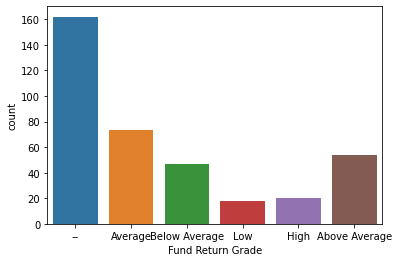

In [21]:
sns.countplot(data=all_eq, x='Fund Return Grade')

In [28]:
pd.crosstab(all_eq['Fund Return Grade'], all_eq['Fund Risk Grade'])

Fund Risk Grade,--,Above Average,Average,Below Average,High,Low
Fund Return Grade,,,,,,
--,162,0,0,0,0,0
Above Average,0,6,19,21,1,7
Average,0,18,29,16,5,5
Below Average,0,17,20,4,6,0
High,0,3,3,6,1,7
Low,0,4,4,1,8,1


<AxesSubplot:xlabel='Fund Return Grade', ylabel='Fund Risk Grade'>

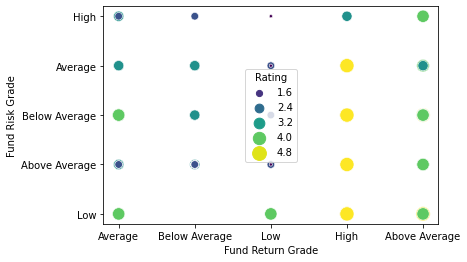

In [55]:
sns.scatterplot(data=all_eq, x='Fund Return Grade', y='Fund Risk Grade', hue='Rating', size='Rating', 
                sizes=(10, 200), palette='viridis', legend='brief')

In [30]:
num_columns = all_eq.select_dtypes('number').columns.to_list()

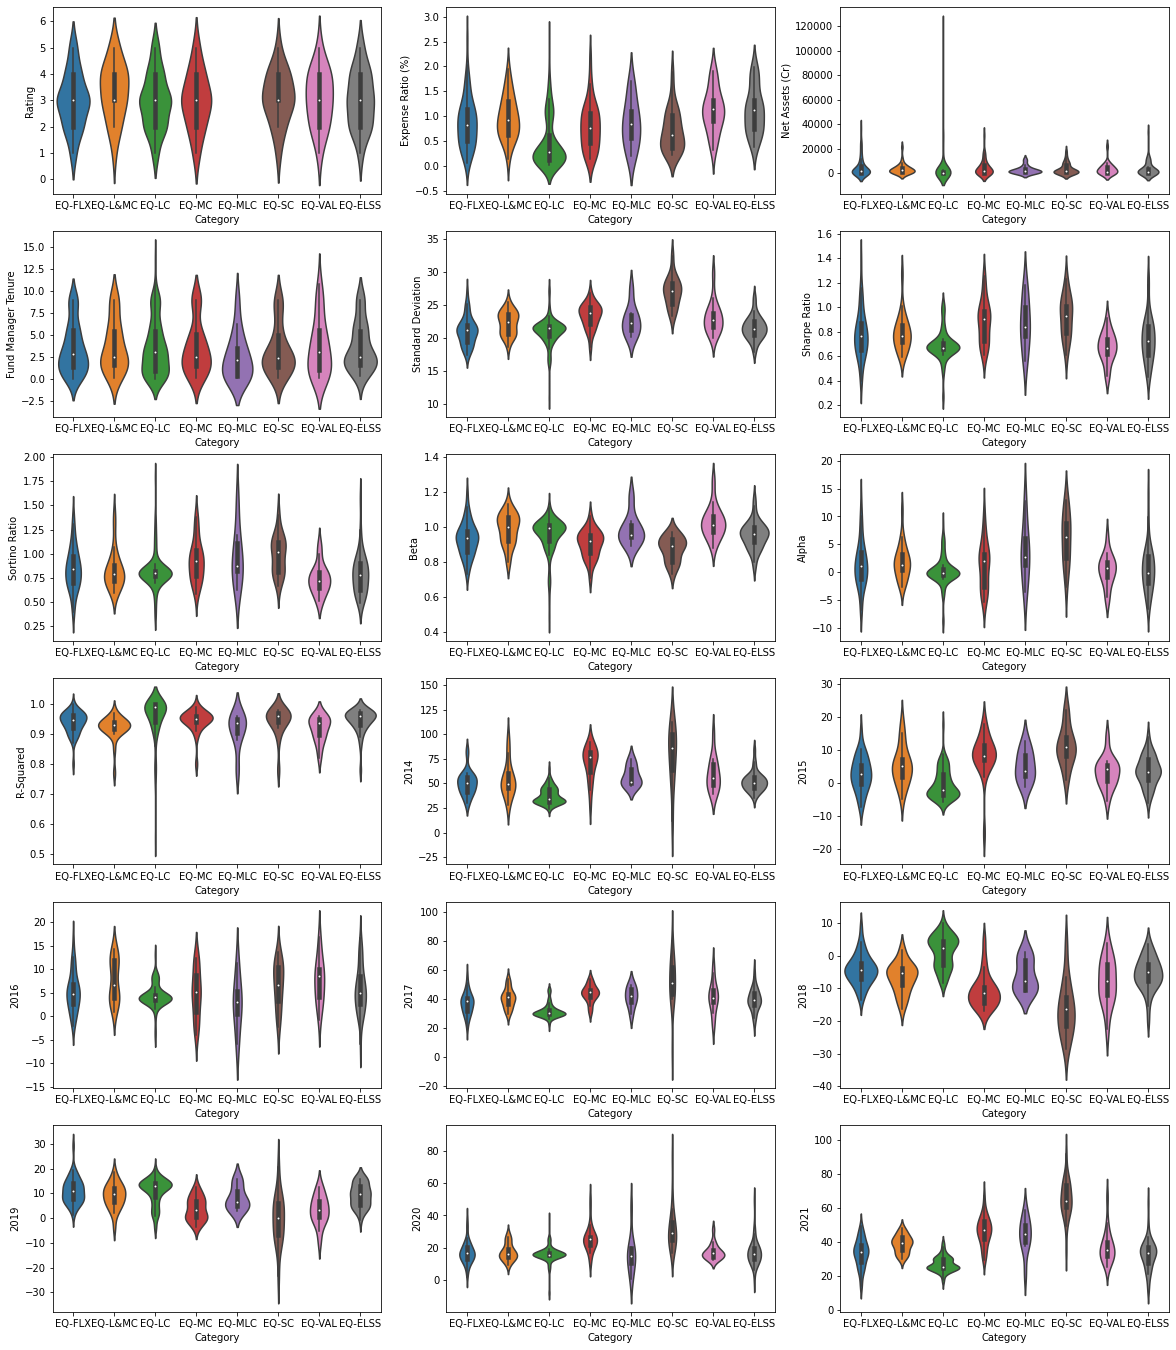

In [23]:
fig, axes = plt.subplots(6,3,figsize=(20,24))
for i, ax in enumerate(axes.ravel()):
    sns.violinplot(data=all_eq, x='Category', y=all_eq.loc[:, num_columns[i]], ax=ax)

<AxesSubplot:xlabel='Category', ylabel='2021'>

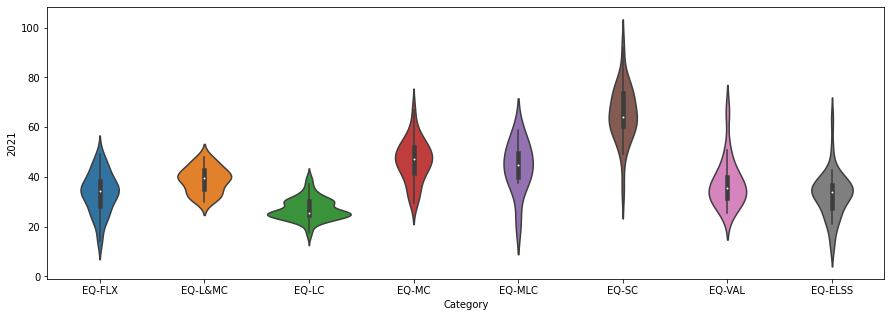

In [24]:
plt.figure(figsize=(15,5))
sns.violinplot(data=all_eq, x='Category', y=2021)

In [25]:
all_eq.groupby('Category').median().sort_values(by=2021)

,Rating,Expense Ratio (%),Net Assets (Cr),Fund Manager Tenure,Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021
Category,,,,,,,,,,,,,,,,,,
EQ-LC,3.0,0.280,219.0,3.05,21.420,0.670,0.800,0.990,-0.190,0.990,34.300,-2.080,4.015,30.160,2.49,13.120,15.715,25.510
EQ-ELSS,3.0,1.120,571.5,2.50,21.320,0.720,0.780,0.960,-0.030,0.960,50.530,3.610,5.060,39.025,-5.08,9.680,16.090,33.800
EQ-FLX,3.0,0.830,1237.0,2.80,21.115,0.765,0.840,0.935,1.170,0.945,50.705,2.970,4.735,38.570,-4.49,11.175,16.480,34.320
EQ-VAL,3.0,1.150,1153.0,3.05,22.665,0.665,0.720,1.010,0.710,0.935,55.405,4.290,8.560,41.060,-7.73,3.510,16.710,35.480
EQ-L&MC,3.0,0.920,2417.0,2.55,22.415,0.765,0.785,1.000,1.360,0.930,49.885,5.220,6.565,41.240,-5.14,9.860,16.050,39.460
EQ-MLC,NaN,0.845,1294.0,2.20,22.205,0.840,0.875,0.950,2.815,0.935,51.630,3.770,2.960,41.960,-7.69,6.550,14.895,44.945
EQ-MC,3.0,0.770,1599.0,2.45,23.665,0.905,0.925,0.920,2.010,0.950,76.560,8.425,5.075,44.650,-11.47,3.310,25.330,47.225
EQ-SC,3.0,0.630,1367.0,2.40,27.070,0.930,1.020,0.890,6.240,0.960,86.435,11.085,6.765,51.440,-16.37,0.010,28.860,64.180


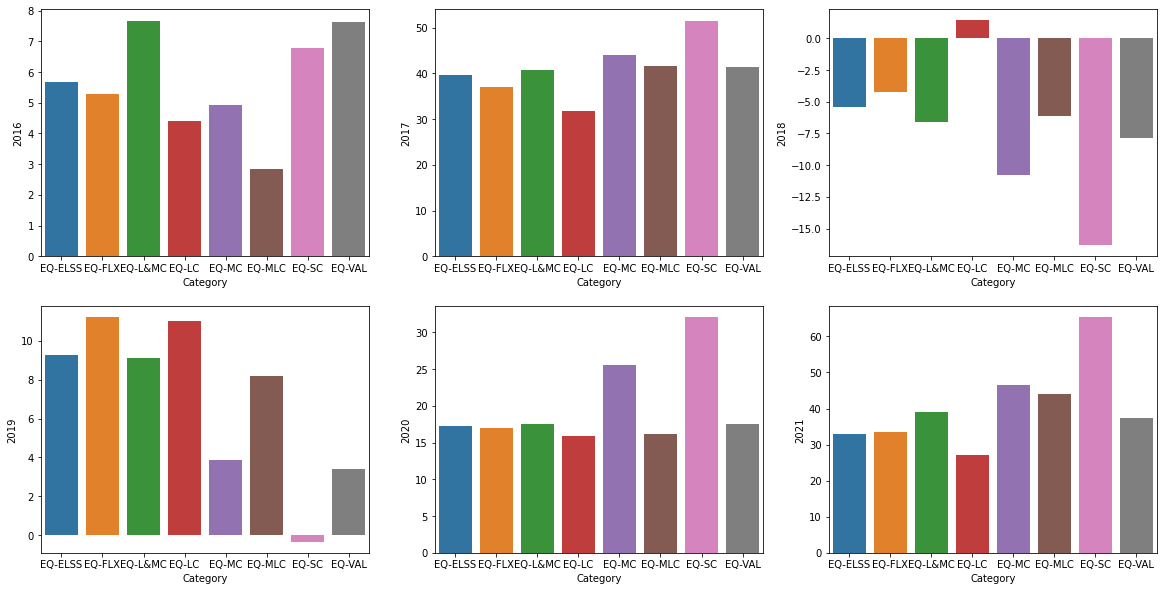

In [26]:
fig, axes = plt.subplots(2,3,figsize=(20,10))
for i, ax in enumerate(axes.ravel()):
    sns.barplot(data=all_eq.groupby('Category').mean(), x=all_eq.groupby('Category').mean().index, y=all_eq.groupby('Category').mean().iloc[:, i+12], ax=ax)

In [27]:
df = all_eq.groupby('Category').mean().swapaxes("index", "columns").iloc[10:, :]
df

Category,EQ-ELSS,EQ-FLX,EQ-L&MC,EQ-LC,EQ-MC,EQ-MLC,EQ-SC,EQ-VAL
2014,52.151290,50.370667,54.083500,37.922656,70.957143,57.627143,79.148333,59.233571
2015,3.856452,2.977576,5.552000,-0.032308,8.553636,5.328571,11.256429,3.404286
2016,5.679429,5.295000,7.665455,4.415526,4.930455,2.857143,6.778571,7.624667
2017,39.717222,37.098378,40.734348,31.803827,43.912273,41.637143,51.441429,41.427333
2018,-5.404444,-4.230256,-6.612174,1.420333,-10.747826,-6.090000,-16.305333,-7.840667
2019,9.278108,11.217727,9.095833,10.992680,3.865833,8.177500,-0.317222,3.412941
2020,17.262500,16.976346,17.487778,15.953796,25.630357,16.136000,32.045909,17.494706
2021,32.984750,33.606667,38.913793,27.158707,46.493667,44.055000,65.247692,37.381667


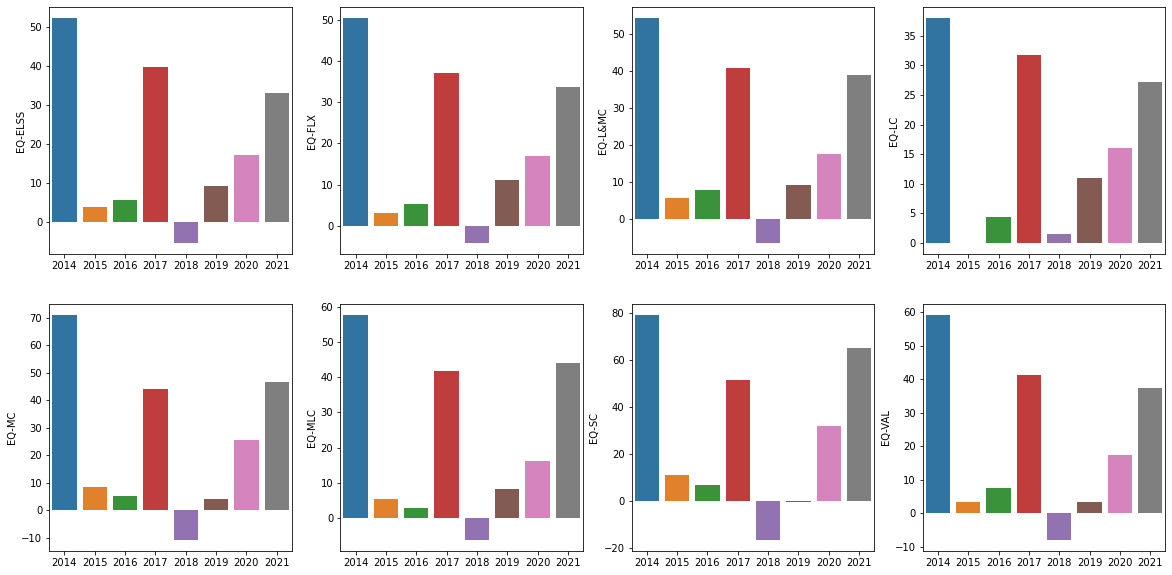

In [20]:
df = all_eq.groupby('Category').mean().swapaxes("index", "columns").iloc[10:, :]
fig, axes = plt.subplots(2,4,figsize=(20,10))
for i, ax in enumerate(axes.ravel()):
    sns.barplot(data=df, x=df.index, y=df.iloc[:, i], ax=ax)

In [36]:
all_eq.groupby('Category').std().sort_values(by=2021)

,Rating,Expense Ratio (%),Net Assets (Cr),Fund Manager Tenure,Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021
Category,,,,,,,,,,,,,,,,,,
EQ-LC,1.061119,0.498816,13100.286627,3.029633,2.042594,0.123219,0.186368,0.102435,2.517899,0.071855,8.340068,4.538447,2.509107,4.755098,4.896300,5.252212,5.114047,4.440859
EQ-L&MC,1.070628,0.428247,4393.964216,2.861968,1.763601,0.147078,0.198026,0.088267,3.090916,0.039506,17.751139,5.908898,4.502434,6.606351,4.605331,5.049565,5.228481,5.120965
EQ-FLX,1.059222,0.505704,7671.274660,2.784161,2.106378,0.195745,0.219772,0.095381,4.151621,0.036889,12.237856,5.253426,4.179365,7.671132,4.642540,5.161716,6.736200,8.225801
EQ-MC,1.087115,0.472375,6624.850180,2.896446,1.851311,0.174380,0.212664,0.078611,4.192235,0.037511,16.865176,6.452826,5.145909,5.954764,5.138607,4.676841,8.171579,8.443483
EQ-ELSS,1.070616,0.465881,6250.709286,2.673660,1.757005,0.183356,0.218144,0.078735,4.158245,0.039553,9.880385,4.506360,4.950982,7.768252,5.049787,4.678832,8.086138,9.071490
EQ-VAL,1.062623,0.435085,4979.698089,3.216398,2.391642,0.123720,0.155316,0.090111,2.812135,0.042225,16.906330,4.602059,4.843142,10.877418,6.955903,5.914220,4.721320,9.556285
EQ-MLC,NaN,0.479573,3099.468166,2.621577,2.271560,0.208459,0.295526,0.087301,5.158484,0.059462,10.275167,4.802234,5.580232,7.017679,5.004278,4.825494,12.050080,10.240453
EQ-SC,0.992620,0.418188,4498.979358,2.776622,2.257659,0.168292,0.195399,0.070898,4.603261,0.049020,29.386858,5.987068,4.799399,17.786245,8.161645,9.950455,13.388160,11.148533


In [73]:
iqr = all_eq[num_columns + ['Category']].groupby('Category').quantile(.75) - \
      all_eq[num_columns + ['Category']].groupby('Category').quantile(.25)
iqr.sort_values(by=2021)

,Rating,Expense Ratio (%),Net Assets (Cr),Fund Manager Tenure,Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021
Category,,,,,,,,,,,,,,,,,,
EQ-LC,2.0,0.5025,1044.00,4.625,1.5350,0.0500,0.0500,0.0900,1.0050,0.0600,12.6325,6.4100,1.2575,3.18,7.385,5.7800,1.7275,5.4675
EQ-L&MC,1.0,0.6800,3411.00,3.825,2.9500,0.1425,0.1650,0.1350,2.8450,0.0225,16.2525,5.3950,8.0200,7.22,5.285,5.7550,5.3250,7.7600
EQ-VAL,2.0,0.4200,4787.00,4.500,2.1325,0.1225,0.1575,0.0900,2.6275,0.0550,20.5150,4.8600,5.9550,8.39,9.345,6.4800,4.2000,8.5525
EQ-ELSS,2.0,0.5775,3080.75,3.800,2.0500,0.2400,0.2800,0.0900,4.7800,0.0400,10.7750,6.4800,6.0450,8.04,5.325,7.6300,6.5550,9.2475
EQ-MLC,NaN,0.5450,2397.75,3.150,2.2625,0.2425,0.2875,0.0650,4.8975,0.0475,13.8800,6.1700,4.9000,8.51,9.275,6.2600,9.3125,9.8700
EQ-FLX,2.0,0.6425,5585.00,4.225,2.5900,0.2200,0.2725,0.1175,4.6875,0.0425,15.5175,5.8300,4.2425,8.90,4.810,6.4325,7.5975,9.9400
EQ-MC,2.0,0.6025,6314.25,3.600,2.4575,0.2450,0.2625,0.1050,5.9075,0.0200,20.1900,4.4475,7.9650,5.32,4.965,6.6600,4.9025,10.4100
EQ-SC,1.0,0.6700,6104.00,3.600,3.2200,0.2200,0.3100,0.1300,6.2500,0.0300,36.1475,5.7925,7.3025,18.80,8.980,12.6850,11.2925,13.1575


In [18]:
pd.melt(iqr.reset_index(), id_vars=['Category'], )

,Category,variable,value
0,EQ-ELSS,Rating,2.0000
1,EQ-FLX,Rating,2.0000
2,EQ-L&MC,Rating,1.0000
3,EQ-LC,Rating,2.0000
4,EQ-MC,Rating,2.0000
...,...,...,...
139,EQ-LC,2021,5.4675
140,EQ-MC,2021,10.4100
141,EQ-MLC,2021,9.8700
142,EQ-SC,2021,13.1575


# Analysis of One Category

In [74]:
all_eq['Category'].unique()

array(['EQ-FLX', 'EQ-L&MC', 'EQ-LC', 'EQ-MC', 'EQ-MLC', 'EQ-SC', 'EQ-VAL',
       'EQ-ELSS'], dtype=object)

In [75]:
one_eq = all_eq[all_eq['Category'] == 'EQ-FLX']

In [76]:
one_eq.iloc[:, 9:15]

,Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared
Fund Name,,,,,,
Aditya Birla Sun Life Bal Bhavishya Yojna - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN
Aditya Birla Sun Life Flexi Cap Fund - Direct Plan,22.96,0.69,0.70,1.03,-0.73,0.97
Aditya Birla Sun Life Retirement Fund - The 30s Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN
Axis Flexi Cap Fund - Direct Plan,17.43,1.06,1.25,0.75,6.46,0.89
Axis Focused 25 Fund - Direct Plan,21.39,0.86,0.88,0.93,3.48,0.91
...,...,...,...,...,...,...
Union Flexi Cap Fund - Direct Plan,20.77,0.91,1.02,0.93,3.93,0.97
Union Focused Fund - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN
UTI Children's Career Fund-Investment Plan - Direct Plan,21.39,0.79,0.84,0.96,1.50,0.96


<AxesSubplot:>

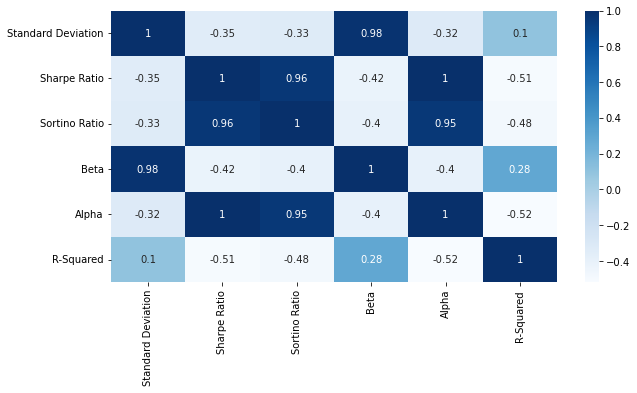

In [77]:
plt.figure(figsize=(10,5))
sns.heatmap(one_eq.iloc[:, 9:15].corr(), annot=True, cmap='Blues')

In [78]:
df = one_eq.iloc[:, -8:]
df

,2014,2015,2016,2017,2018,2019,2020,2021
Fund Name,,,,,,,,
Aditya Birla Sun Life Bal Bhavishya Yojna - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,16.29,14.24
Aditya Birla Sun Life Flexi Cap Fund - Direct Plan,58.03,3.87,16.24,35.07,-3.01,9.53,17.11,31.38
Aditya Birla Sun Life Retirement Fund - The 30s Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,16.67,14.37
Axis Flexi Cap Fund - Direct Plan,NaN,NaN,NaN,NaN,8.79,19.04,21.08,29.93
Axis Focused 25 Fund - Direct Plan,40.37,5.38,5.82,46.86,1.83,16.20,22.48,25.35
...,...,...,...,...,...,...,...,...
Union Flexi Cap Fund - Direct Plan,40.92,-6.75,2.17,28.35,-2.75,12.39,21.82,38.27
Union Focused Fund - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,21.81,35.44
UTI Children's Career Fund-Investment Plan - Direct Plan,45.38,-1.23,6.49,39.83,-3.73,7.86,20.42,34.10


In [79]:
df.head()

,2014,2015,2016,2017,2018,2019,2020,2021
Fund Name,,,,,,,,
Aditya Birla Sun Life Bal Bhavishya Yojna - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,16.29,14.24
Aditya Birla Sun Life Flexi Cap Fund - Direct Plan,58.03,3.87,16.24,35.07,-3.01,9.53,17.11,31.38
Aditya Birla Sun Life Retirement Fund - The 30s Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,16.67,14.37
Axis Flexi Cap Fund - Direct Plan,NaN,NaN,NaN,NaN,8.79,19.04,21.08,29.93
Axis Focused 25 Fund - Direct Plan,40.37,5.38,5.82,46.86,1.83,16.20,22.48,25.35


In [80]:
df.shape

(66, 8)

In [81]:
df.describe()

,2014,2015,2016,2017,2018,2019,2020,2021
count,30.000000,33.000000,36.000000,37.000000,39.000000,44.000000,52.000000,57.000000
mean,50.370667,2.977576,5.295000,37.098378,-4.230256,11.217727,16.976346,33.606667
std,12.237856,5.253426,4.179365,7.671132,4.642540,5.161716,6.736200,8.225801
min,29.760000,-7.280000,-1.970000,19.570000,-13.670000,1.400000,1.720000,14.240000
25%,41.515000,-0.130000,2.680000,32.070000,-6.995000,7.640000,12.885000,28.330000
50%,50.705000,2.970000,4.735000,38.570000,-4.490000,11.175000,16.480000,34.320000
75%,57.032500,5.700000,6.922500,40.970000,-2.185000,14.072500,20.482500,38.270000
max,83.020000,15.740000,16.240000,56.850000,8.790000,29.230000,38.540000,49.340000


number of mutual funds in each year

In [82]:
df.count()

2014    30
2015    33
2016    36
2017    37
2018    39
2019    44
2020    52
2021    57
dtype: int64

number of years each mutual fund is operating

In [83]:
df.count(axis=1)

Fund Name
Aditya Birla Sun Life Bal Bhavishya Yojna - Direct Plan               2
Aditya Birla Sun Life Flexi Cap Fund - Direct Plan                    8
Aditya Birla Sun Life Retirement Fund - The 30s Plan - Direct Plan    2
Axis Flexi Cap Fund - Direct Plan                                     4
Axis Focused 25 Fund - Direct Plan                                    8
                                                                     ..
Union Flexi Cap Fund - Direct Plan                                    8
Union Focused Fund - Direct Plan                                      2
UTI Children's Career Fund-Investment Plan - Direct Plan              8
UTI Flexi Cap Fund - Direct Plan                                      8
UTI Focused Equity Fund - Direct Plan                                 0
Length: 66, dtype: int64

average return of all funds by year

In [84]:
df.mean()

2014    50.370667
2015     2.977576
2016     5.295000
2017    37.098378
2018    -4.230256
2019    11.217727
2020    16.976346
2021    33.606667
dtype: float64

percentage of funds having positive return by year

In [85]:
(df>0).sum() / df.count() * 100

2014    100.000000
2015     72.727273
2016     91.666667
2017    100.000000
2018     17.948718
2019    100.000000
2020    100.000000
2021    100.000000
dtype: float64

Select funds with minimum years of history and from recent years

In [86]:
dfd = df.iloc[:, :].dropna(thresh=3)
dfd.shape

(44, 8)

In [87]:
dfd.count(axis=1)

Fund Name
Aditya Birla Sun Life Flexi Cap Fund - Direct Plan                     8
Axis Flexi Cap Fund - Direct Plan                                      4
Axis Focused 25 Fund - Direct Plan                                     8
BNP Paribas Focused 25 Equity Fund - Direct Plan                       4
Canara Robeco Flexi Cap Fund - Direct Plan                             8
DSP Flexi Cap Fund - Direct Plan                                       8
DSP Focus Fund - Direct Plan                                           8
Edelweiss Flexi Cap Fund - Direct Plan                                 6
Franklin India Flexi Cap Fund - Direct Plan                            8
Franklin India Focused Equity Fund - Direct Plan                       8
HDFC Flexi Cap Fund - Direct Plan                                      8
HDFC Focused 30 Fund - Direct Plan                                     8
HDFC Retirement Savings Fund Equity Plan - Direct Plan                 5
HSBC Flexi Cap Fund - Direct Plan        

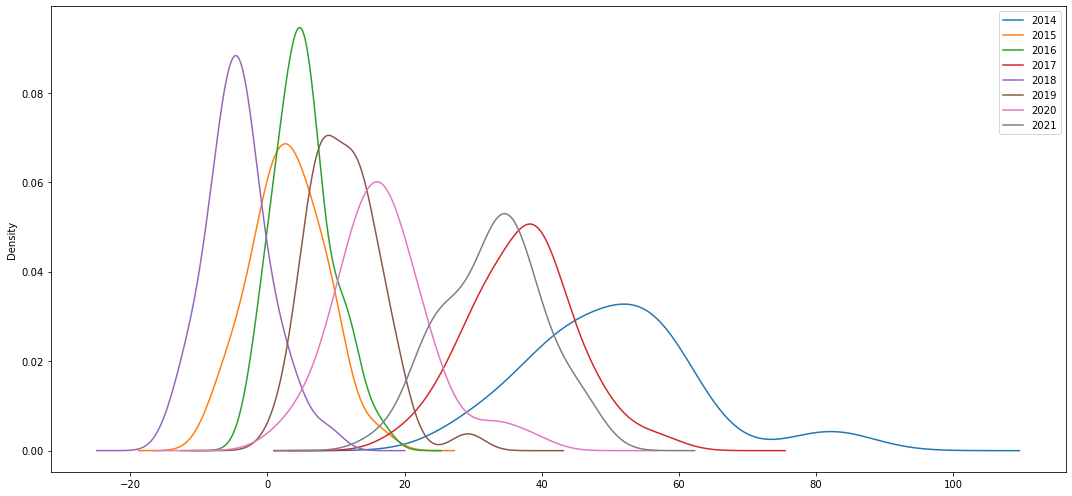

In [88]:
dfd.plot.kde(figsize=(15,7))
plt.tight_layout()
plt.show()

# CAGR

Cumulative Annual Growth Rate

In [89]:
def total_return(x):
    s = 1
    for i in x:
        if not np.isnan(i):
            s *= (1 + i/100)
    return s

In [90]:
cagr = (dfd.apply(lambda row : total_return(row), axis=1)**(1/dfd.count(axis=1)) - 1).sort_values(ascending=False)
cagr.name = 'cagr'

In [91]:
cagr.sort_values(ascending=False)

Fund Name
Parag Parikh Flexi Cap Fund - Direct Plan                              0.219196
SBI Focused Equity Fund - Direct Plan                                  0.216898
Nippon India Focused Equity Fund - Direct Plan                         0.208976
Franklin India Focused Equity Fund - Direct Plan                       0.206105
Navi Flexi Cap Fund - Direct Plan                                      0.201878
PGIM India Flexi Cap Fund - Direct Plan                                0.198753
HDFC Retirement Savings Fund Equity Plan - Direct Plan                 0.197444
Aditya Birla Sun Life Flexi Cap Fund - Direct Plan                     0.196922
Axis Focused 25 Fund - Direct Plan                                     0.195630
SBI Flexicap Fund - Direct Plan                                        0.195321
JM Flexicap Fund - Direct Plan                                         0.194882
Axis Flexi Cap Fund - Direct Plan                                      0.194719
UTI Flexi Cap Fund - Direct Pl

# Ergodic Sum

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
values = dfd.to_numpy()

In [94]:
scaled = StandardScaler(with_mean=False, with_std=True).fit_transform(values)

In [95]:
scaled = np.round(scaled, 3)

In [96]:
scaled_dfd = pd.DataFrame(scaled, index=dfd.index, columns=dfd.columns)

In [97]:
scaled_dfd

,2014,2015,2016,2017,2018,2019,2020,2021
Fund Name,,,,,,,,
Aditya Birla Sun Life Flexi Cap Fund - Direct Plan,4.823,0.748,3.941,4.635,-0.657,1.868,2.408,4.453
Axis Flexi Cap Fund - Direct Plan,NaN,NaN,NaN,NaN,1.918,3.731,2.966,4.247
Axis Focused 25 Fund - Direct Plan,3.355,1.040,1.412,6.193,0.399,3.175,3.163,3.597
BNP Paribas Focused 25 Equity Fund - Direct Plan,NaN,NaN,NaN,NaN,-2.339,2.777,2.432,3.369
Canara Robeco Flexi Cap Fund - Direct Plan,3.354,0.128,-0.335,5.114,0.336,2.626,3.357,4.882
DSP Flexi Cap Fund - Direct Plan,4.476,-0.025,1.160,5.426,-1.475,3.529,2.811,4.806
DSP Focus Fund - Direct Plan,4.218,0.522,1.677,3.996,-1.052,3.782,1.428,3.345
Edelweiss Flexi Cap Fund - Direct Plan,NaN,NaN,0.294,6.330,-0.790,2.026,2.312,5.261
Franklin India Flexi Cap Fund - Direct Plan,4.822,1.065,1.497,4.238,-0.742,0.829,2.372,5.864


In [98]:
(scaled_dfd>0).sum()/scaled_dfd.count()

2014    1.000000
2015    0.727273
2016    0.916667
2017    1.000000
2018    0.179487
2019    1.000000
2020    1.000000
2021    1.000000
dtype: float64

In [99]:
ergodic = (scaled_dfd[scaled_dfd>0].sum(axis=1).add(2*scaled_dfd[scaled_dfd<0].sum(axis=1))/dfd.count(axis=1)).sort_values(ascending=False)
ergodic.name = 'ergodic'
ergodic

Fund Name
Axis Flexi Cap Fund - Direct Plan                                      3.215500
Navi Flexi Cap Fund - Direct Plan                                      3.204333
Parag Parikh Flexi Cap Fund - Direct Plan                              3.120375
Tata Flexi Cap Fund - Direct Plan                                      2.949333
SBI Focused Equity Fund - Direct Plan                                  2.934250
ICICI Prudential S&P BSE 500 ETF                                       2.893000
IIFL Focused Equity Fund - Direct Plan                                 2.821286
PGIM India Flexi Cap Fund - Direct Plan                                2.819500
L&T Focused Equity Fund - Direct Plan                                  2.800000
Axis Focused 25 Fund - Direct Plan                                     2.791750
HDFC Retirement Savings Fund Equity Plan - Direct Plan                 2.735000
Aditya Birla Sun Life Flexi Cap Fund - Direct Plan                     2.695250
UTI Flexi Cap Fund - Direct Pl

without standardizing

In [100]:
(dfd[dfd>0].sum(axis=1).add(2*dfd[dfd<0].sum(axis=1))/dfd.count(axis=1)).sort_values(ascending=False).head(10)

Fund Name
SBI Focused Equity Fund - Direct Plan                 23.181250
Parag Parikh Flexi Cap Fund - Direct Plan             23.123750
Nippon India Focused Equity Fund - Direct Plan        22.322500
Franklin India Focused Equity Fund - Direct Plan      22.307500
Aditya Birla Sun Life Flexi Cap Fund - Direct Plan    20.651250
PGIM India Flexi Cap Fund - Direct Plan               20.648333
Navi Flexi Cap Fund - Direct Plan                     20.640000
UTI Flexi Cap Fund - Direct Plan                      20.580000
Axis Focused 25 Fund - Direct Plan                    20.536250
SBI Flexicap Fund - Direct Plan                       20.361250
dtype: float64

# Average Ranking

Ranking of each fund in each year - bigger number is better

In [101]:
dfdr = dfd.rank(axis=0, ascending = True)
dfdr

,2014,2015,2016,2017,2018,2019,2020,2021
Fund Name,,,,,,,,
Aditya Birla Sun Life Flexi Cap Fund - Direct Plan,25.0,19.0,36.0,14.0,26.0,20.0,26.0,18.0
Axis Flexi Cap Fund - Direct Plan,NaN,NaN,NaN,NaN,39.0,42.0,35.0,14.0
Axis Focused 25 Fund - Direct Plan,6.0,23.0,21.0,34.0,36.0,38.0,38.0,9.0
BNP Paribas Focused 25 Equity Fund - Direct Plan,NaN,NaN,NaN,NaN,4.0,34.0,27.0,6.0
Canara Robeco Flexi Cap Fund - Direct Plan,5.0,11.0,2.0,21.0,35.0,31.0,39.0,26.0
DSP Flexi Cap Fund - Direct Plan,19.0,9.0,19.0,29.0,13.0,41.0,32.0,22.0
DSP Focus Fund - Direct Plan,16.0,16.0,27.0,7.0,18.0,43.0,5.0,5.0
Edelweiss Flexi Cap Fund - Direct Plan,NaN,NaN,6.0,35.0,24.0,21.0,21.0,32.0
Franklin India Flexi Cap Fund - Direct Plan,24.0,24.0,23.0,10.0,25.0,3.0,24.0,39.0


Percentile ranking of funds

In [102]:
dfdr = dfdr/dfdr.count()*100
dfdr

,2014,2015,2016,2017,2018,2019,2020,2021
Fund Name,,,,,,,,
Aditya Birla Sun Life Flexi Cap Fund - Direct Plan,83.333333,57.575758,100.000000,37.837838,66.666667,45.454545,59.090909,40.909091
Axis Flexi Cap Fund - Direct Plan,NaN,NaN,NaN,NaN,100.000000,95.454545,79.545455,31.818182
Axis Focused 25 Fund - Direct Plan,20.000000,69.696970,58.333333,91.891892,92.307692,86.363636,86.363636,20.454545
BNP Paribas Focused 25 Equity Fund - Direct Plan,NaN,NaN,NaN,NaN,10.256410,77.272727,61.363636,13.636364
Canara Robeco Flexi Cap Fund - Direct Plan,16.666667,33.333333,5.555556,56.756757,89.743590,70.454545,88.636364,59.090909
DSP Flexi Cap Fund - Direct Plan,63.333333,27.272727,52.777778,78.378378,33.333333,93.181818,72.727273,50.000000
DSP Focus Fund - Direct Plan,53.333333,48.484848,75.000000,18.918919,46.153846,97.727273,11.363636,11.363636
Edelweiss Flexi Cap Fund - Direct Plan,NaN,NaN,16.666667,94.594595,61.538462,47.727273,47.727273,72.727273
Franklin India Flexi Cap Fund - Direct Plan,80.000000,72.727273,63.888889,27.027027,64.102564,6.818182,54.545455,88.636364


## Funds in top percentile

In [103]:
top_percentile = (dfdr[dfdr>=50].count(axis=1)/dfdr.count(axis=1)).sort_values(ascending=False)

In [104]:
top_percentile.name = 'top_percentile'

In [105]:
top_percentile.head(10)

Fund Name
HDFC Retirement Savings Fund Equity Plan - Direct Plan    0.800000
Franklin India Flexi Cap Fund - Direct Plan               0.750000
Axis Focused 25 Fund - Direct Plan                        0.750000
Axis Flexi Cap Fund - Direct Plan                         0.750000
DSP Flexi Cap Fund - Direct Plan                          0.750000
SBI Focused Equity Fund - Direct Plan                     0.750000
SBI Flexicap Fund - Direct Plan                           0.750000
Franklin India Focused Equity Fund - Direct Plan          0.750000
IIFL Focused Equity Fund - Direct Plan                    0.714286
Tata Flexi Cap Fund - Direct Plan                         0.666667
Name: top_percentile, dtype: float64

## Average percentile rank

In [106]:
dfdr['rank'] = dfdr.sum(axis=1)/dfdr.count(axis=1)/100

In [107]:
dfdr.sort_values(by='rank', ascending=False)

,2014,2015,2016,2017,2018,2019,2020,2021,rank
Fund Name,,,,,,,,,
Axis Flexi Cap Fund - Direct Plan,NaN,NaN,NaN,NaN,100.000000,95.454545,79.545455,31.818182,0.767045
SBI Focused Equity Fund - Direct Plan,88.333333,66.666667,30.555556,89.189189,69.230769,88.636364,43.181818,95.454545,0.714060
Parag Parikh Flexi Cap Fund - Direct Plan,40.000000,90.909091,38.888889,16.216216,85.897436,81.818182,97.727273,100.000000,0.689321
IIFL Focused Equity Fund - Direct Plan,NaN,54.545455,86.111111,24.324324,41.025641,100.000000,90.909091,79.545455,0.680659
Axis Focused 25 Fund - Direct Plan,20.000000,69.696970,58.333333,91.891892,92.307692,86.363636,86.363636,20.454545,0.656765
JM Flexicap Fund - Direct Plan,76.666667,22.727273,97.222222,75.675676,48.717949,90.909091,27.272727,52.272727,0.614330
Aditya Birla Sun Life Flexi Cap Fund - Direct Plan,83.333333,57.575758,100.000000,37.837838,66.666667,45.454545,59.090909,40.909091,0.613585
Kotak Flexicap Fund - Direct Plan,88.333333,60.606061,88.888889,43.243243,85.897436,68.181818,29.545455,25.000000,0.612120
SBI Flexicap Fund - Direct Plan,73.333333,96.969697,77.777778,51.351351,53.846154,52.272727,38.636364,43.181818,0.609212


# More than mean returns

In [108]:
dfd.mean()

2014    50.370667
2015     2.977576
2016     5.295000
2017    37.098378
2018    -4.230256
2019    11.217727
2020    16.950682
2021    32.909318
dtype: float64

Excess return of fund (fund return - mean return in year)

In [109]:
dfdm = dfd-dfd.mean()
dfdm

,2014,2015,2016,2017,2018,2019,2020,2021
Fund Name,,,,,,,,
Aditya Birla Sun Life Flexi Cap Fund - Direct Plan,7.659333,0.892424,10.945,-2.028378,1.220256,-1.687727,0.159318,-1.529318
Axis Flexi Cap Fund - Direct Plan,NaN,NaN,NaN,NaN,13.020256,7.822273,4.129318,-2.979318
Axis Focused 25 Fund - Direct Plan,-10.000667,2.402424,0.525,9.761622,6.060256,4.982273,5.529318,-7.559318
BNP Paribas Focused 25 Equity Fund - Direct Plan,NaN,NaN,NaN,NaN,-6.489744,2.952273,0.329318,-9.169318
Canara Robeco Flexi Cap Fund - Direct Plan,-10.010667,-2.317576,-6.675,1.601622,5.770256,2.182273,6.909318,1.490682
DSP Flexi Cap Fund - Direct Plan,3.489333,-3.107576,-0.515,3.961622,-2.529744,6.792273,3.029318,0.960682
DSP Focus Fund - Direct Plan,0.379333,-0.277576,1.615,-6.858378,-0.589744,8.082273,-6.800682,-9.339318
Edelweiss Flexi Cap Fund - Direct Plan,NaN,NaN,-4.085,10.801622,0.610256,-0.877727,-0.520682,4.160682
Franklin India Flexi Cap Fund - Direct Plan,7.649333,2.532424,0.875,-5.028378,0.830256,-6.987727,-0.090682,8.410682


## alpha

In [110]:
alpha = (dfdm.sum(axis=1)/dfdm.count(axis=1)).sort_values(ascending=False)
alpha.name = 'alpha'
alpha

Fund Name
Axis Flexi Cap Fund - Direct Plan                                      5.498132
PGIM India Flexi Cap Fund - Direct Plan                                5.096525
Nippon India Focused Equity Fund - Direct Plan                         4.732614
SBI Focused Equity Fund - Direct Plan                                  4.453864
IIFL Focused Equity Fund - Direct Plan                                 4.368796
Franklin India Focused Equity Fund - Direct Plan                       4.196364
Parag Parikh Flexi Cap Fund - Direct Plan                              4.050114
HDFC Retirement Savings Fund Equity Plan - Direct Plan                 2.428830
JM Flexicap Fund - Direct Plan                                         2.007614
Aditya Birla Sun Life Flexi Cap Fund - Direct Plan                     1.953864
SBI Flexicap Fund - Direct Plan                                        1.837614
Edelweiss Flexi Cap Fund - Direct Plan                                 1.681525
Tata Retirement Savings Fund -

## Funds consistently given positive excess returns

In [111]:
dfdm['consistency'] = dfdm[dfdm > 0].count(axis=1)*100/dfdm.count(axis=1)/100

In [112]:
dfdm.sort_values(by='consistency', ascending=False).head(10)

,2014,2015,2016,2017,2018,2019,2020,2021,consistency
Fund Name,,,,,,,,,
Axis Focused 25 Fund - Direct Plan,-10.000667,2.402424,0.525,9.761622,6.060256,4.982273,5.529318,-7.559318,0.750000
SBI Focused Equity Fund - Direct Plan,8.699333,2.372424,-2.165,8.881622,1.460256,5.962273,-1.200682,11.620682,0.750000
Axis Flexi Cap Fund - Direct Plan,NaN,NaN,NaN,NaN,13.020256,7.822273,4.129318,-2.979318,0.750000
IIFL Focused Equity Fund - Direct Plan,NaN,0.112424,5.365,-5.378378,-1.099744,18.012273,8.569318,5.000682,0.714286
PGIM India Flexi Cap Fund - Direct Plan,NaN,NaN,-5.195,1.481622,-1.699744,0.862273,21.589318,13.540682,0.666667
Navi Flexi Cap Fund - Direct Plan,NaN,NaN,NaN,NaN,NaN,4.322273,-5.990682,2.510682,0.666667
Aditya Birla Sun Life Flexi Cap Fund - Direct Plan,7.659333,0.892424,10.945,-2.028378,1.220256,-1.687727,0.159318,-1.529318,0.625000
HSBC Flexi Cap Fund - Direct Plan,5.479333,-4.357576,1.055,4.211622,-5.659744,-3.967727,0.399318,2.600682,0.625000
UTI Children's Career Fund-Investment Plan - Direct Plan,-4.990667,-4.207576,1.195,2.731622,0.500256,-3.357727,3.469318,1.190682,0.625000


# All Metrics

In [113]:
all_metrics = (dfdm['consistency'].to_frame().join(top_percentile).join(dfdr['rank']).join(cagr).join(ergodic).join(alpha)).sort_values(by=['ergodic'], ascending=False)

In [114]:
all_metrics.columns.append(one_eq.columns[9:12])

Index(['consistency', 'top_percentile', 'rank', 'cagr', 'ergodic', 'alpha',
       'Standard Deviation', 'Sharpe Ratio', 'Sortino Ratio'],
      dtype='object')

In [115]:
all_metrics.join(one_eq).loc[:, all_metrics.columns.append(one_eq.columns[9:12])]

,consistency,top_percentile,rank,cagr,ergodic,alpha,Standard Deviation,Sharpe Ratio,Sortino Ratio
Fund Name,,,,,,,,,
Axis Flexi Cap Fund - Direct Plan,0.750000,0.750000,0.767045,0.194719,3.215500,5.498132,17.43,1.06,1.25
Navi Flexi Cap Fund - Direct Plan,0.666667,0.666667,0.553030,0.201878,3.204333,0.280758,21.14,0.76,0.73
Parag Parikh Flexi Cap Fund - Direct Plan,0.625000,0.625000,0.689321,0.219196,3.120375,4.050114,17.77,1.37,1.39
Tata Flexi Cap Fund - Direct Plan,0.333333,0.666667,0.492424,0.190260,2.949333,-1.152576,18.39,0.82,0.91
SBI Focused Equity Fund - Direct Plan,0.750000,0.750000,0.714060,0.216898,2.934250,4.453864,20.49,1.09,1.06
ICICI Prudential S&P BSE 500 ETF,0.333333,0.333333,0.492424,0.189630,2.893000,-1.042576,21.82,0.72,0.81
IIFL Focused Equity Fund - Direct Plan,0.714286,0.714286,0.680659,0.179833,2.821286,4.368796,22.06,1.16,1.15
PGIM India Flexi Cap Fund - Direct Plan,0.666667,0.666667,0.592680,0.198753,2.819500,5.096525,22.47,1.12,1.31
L&T Focused Equity Fund - Direct Plan,0.333333,0.333333,0.439394,0.178822,2.800000,-2.369242,17.76,0.77,0.84


In [116]:
all_eq.loc[all_metrics.index]

,Rating,Category,Launch,Expense Ratio (%),Net Assets (Cr),Fund Manager Tenure,Fund Risk Grade,Fund Return Grade,Riskometer,Standard Deviation,...,Alpha,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021
Fund Name,,,,,,,,,,,,,,,,,,,,,
Axis Flexi Cap Fund - Direct Plan,4.0,EQ-FLX,2017-11-20 00:00:00,0.55,10823.0,4.2,Low,Above Average,Very High,17.43,...,6.46,0.89,NaN,NaN,NaN,NaN,8.79,19.04,21.08,29.93
Navi Flexi Cap Fund - Direct Plan,3.0,EQ-FLX,2018-07-09 00:00:00,0.43,203.0,0.3,Below Average,Average,Very High,21.14,...,0.93,0.96,NaN,NaN,NaN,NaN,NaN,15.54,10.96,35.42
Parag Parikh Flexi Cap Fund - Direct Plan,5.0,EQ-FLX,2013-05-28 00:00:00,0.82,18299.0,8.6,Low,High,Very High,17.77,...,12.83,0.80,45.50,9.51,3.86,30.10,0.16,15.34,33.55,46.97
Tata Flexi Cap Fund - Direct Plan,3.0,EQ-FLX,2018-09-06 00:00:00,0.74,2130.0,3.4,Below Average,Average,Very High,18.39,...,1.97,0.95,NaN,NaN,NaN,NaN,NaN,12.80,16.49,28.33
SBI Focused Equity Fund - Direct Plan,4.0,EQ-FLX,2013-01-01 00:00:00,0.69,23093.0,9.0,Average,Above Average,Very High,20.49,...,8.42,0.87,59.07,5.35,3.13,45.98,-2.77,17.18,15.75,44.53
ICICI Prudential S&P BSE 500 ETF,NaN,EQ-FLX,2018-05-09 00:00:00,0.28,65.0,3.7,--,--,Very High,21.82,...,-0.25,1.00,NaN,NaN,NaN,NaN,NaN,8.83,17.83,31.29
IIFL Focused Equity Fund - Direct Plan,5.0,EQ-FLX,2014-10-30 00:00:00,0.90,2469.0,2.1,Below Average,High,Very High,22.06,...,10.09,0.92,NaN,3.09,10.66,31.72,-5.33,29.23,25.52,37.91
PGIM India Flexi Cap Fund - Direct Plan,5.0,EQ-FLX,2015-03-04 00:00:00,0.32,2888.0,3.7,Average,High,Very High,22.47,...,9.34,0.93,NaN,NaN,0.10,38.58,-5.93,12.08,38.54,46.45
L&T Focused Equity Fund - Direct Plan,3.0,EQ-FLX,2018-11-05 00:00:00,1.08,989.0,3.2,Below Average,Below Average,Very High,17.76,...,1.26,0.92,NaN,NaN,NaN,NaN,NaN,14.04,14.75,25.18


In [117]:
high = [2007,2009,2010,2012,2014,2017,2020,2021]
low = [2008,2011,2013,2015,2016,2018,2019]
s1 = dfdm.loc[:, high[-3:]].mean(axis=1).rename('high')
s2 = dfdm.loc[:, low[-4:]].mean(axis=1).rename('low')
hl = pd.concat([s1, s2], axis=1)
hl['diff'] = hl['high'] - hl['low']
hl.sort_values('low', ascending=False)

,high,low,diff
Fund Name,,,
Axis Flexi Cap Fund - Direct Plan,0.575000,10.421265,-9.846265
IIFL Focused Equity Fund - Direct Plan,2.730541,5.597488,-2.866948
Navi Flexi Cap Fund - Direct Plan,-1.740000,4.322273,-6.062273
Axis Focused 25 Fund - Direct Plan,2.577207,3.492488,-0.915281
Parag Parikh Flexi Cap Fund - Direct Plan,7.887207,3.402488,4.484719
Kotak Flexicap Fund - Direct Plan,-3.872793,3.239988,-7.112781
Motilal Oswal Flexi Cap Fund - Direct Plan,-4.946126,2.939988,-7.886114
Aditya Birla Sun Life Flexi Cap Fund - Direct Plan,-1.132793,2.842488,-3.975281
L&T Focused Equity Fund - Direct Plan,-4.965000,2.822273,-7.787273


<AxesSubplot:>

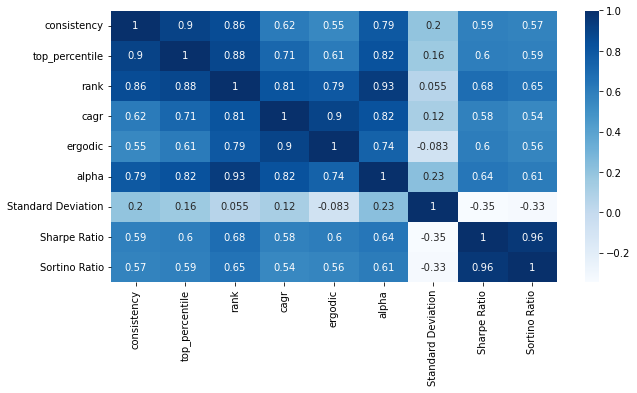

In [118]:
plt.figure(figsize=(10,5))
sns.heatmap(all_metrics.join(one_eq).loc[:, all_metrics.columns.append(one_eq.columns[9:12])].corr(), annot=True, cmap='Blues')

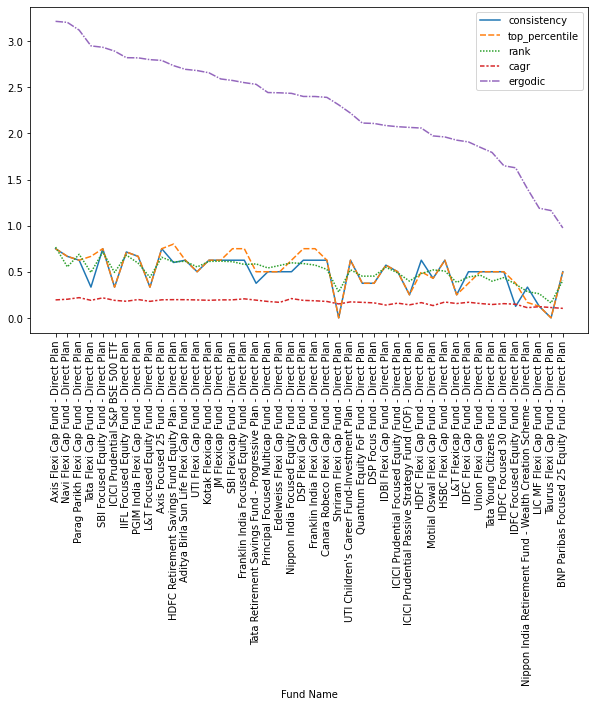

In [119]:
plt.figure(figsize=(10,6))
sns.lineplot(data=all_metrics.iloc[:, :5], sort=False)
# plt.xticks(np.arange(len(all_metrics)), [])
plt.xticks(rotation=90)
plt.show()

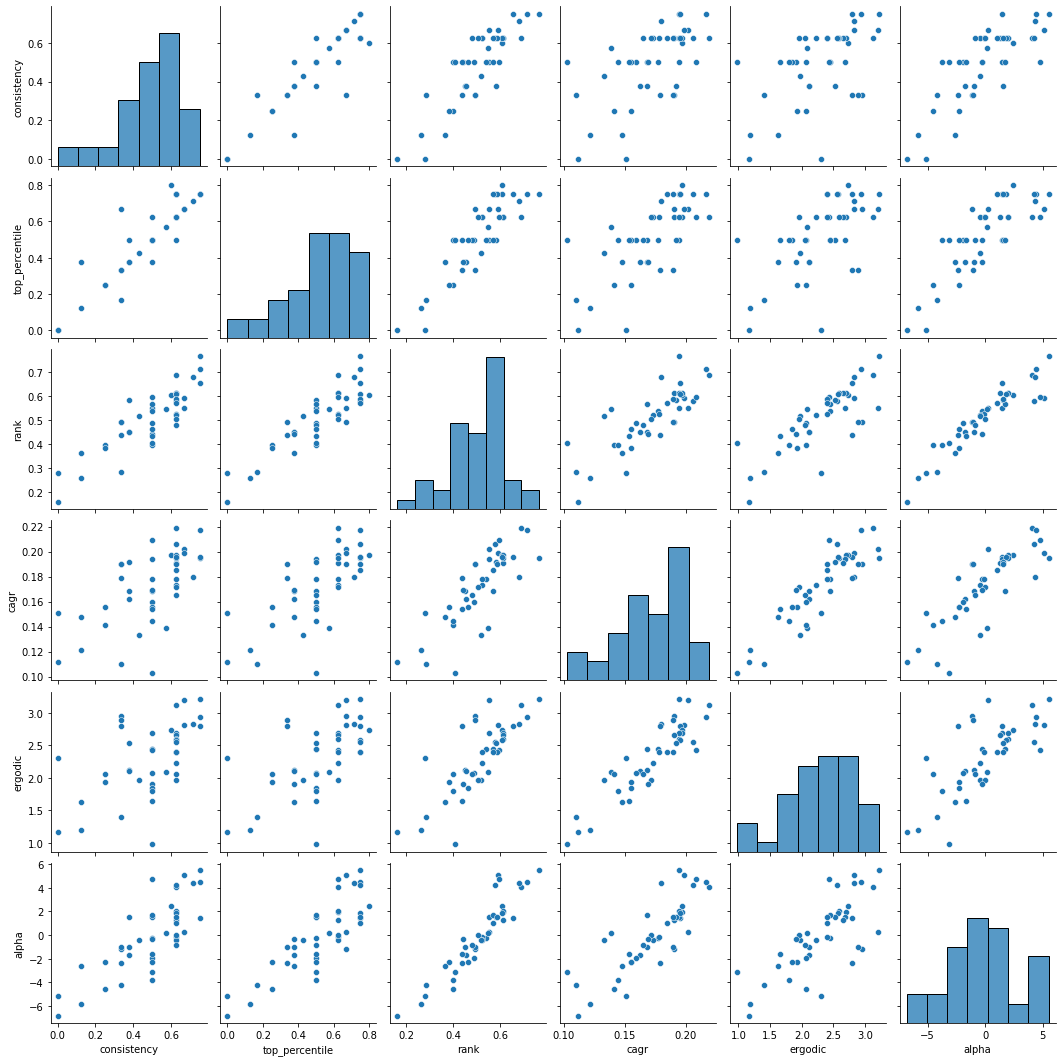

In [71]:
sns.pairplot(all_metrics)

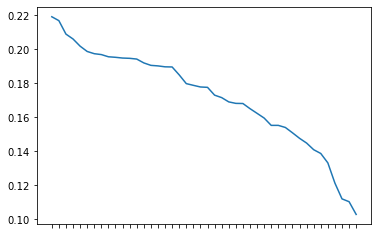

In [72]:
# dfdm.sum(axis=1).sort_values(ascending=False).plot()
plt.plot(cagr.sort_values(ascending=False))
plt.xticks(np.arange(len(dfdm)), [])
plt.show()

A colorful plot to end.

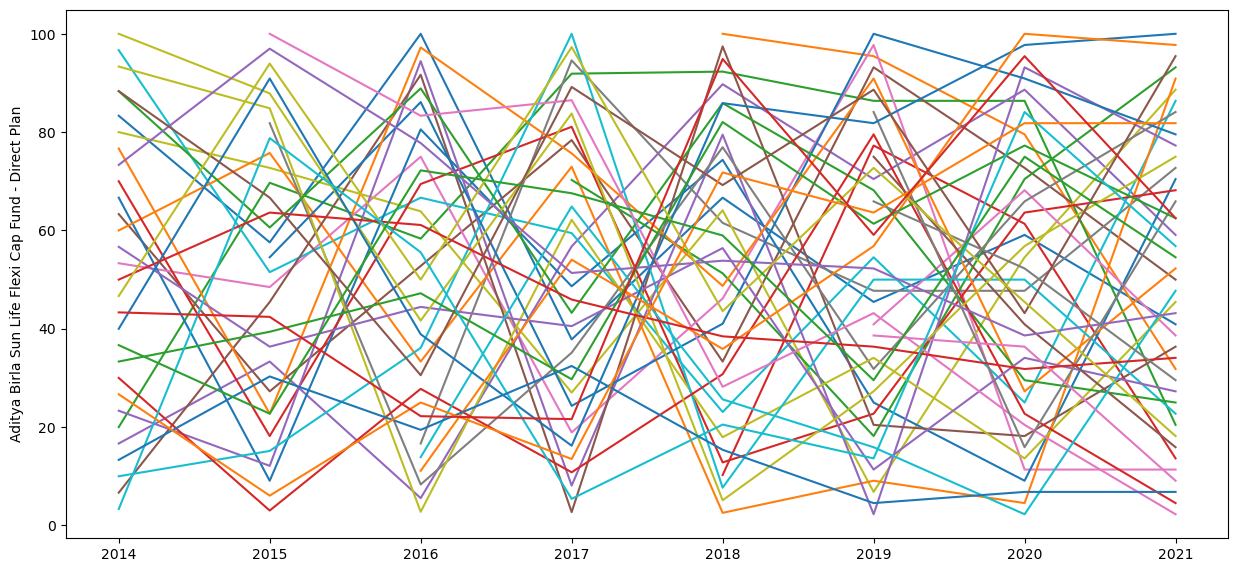

In [73]:
plt.figure(figsize=(15,7), dpi=100)
for index, row in dfdr.iloc[:, :-1].iterrows():
    sns.lineplot(data=row)